In [3]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [4]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
path = '/content/drive/MyDrive/game_state_frame_data.parquet'


Data = pq.read_table(path)
data = Data.to_pandas()
data

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
0,1,2511,T,Team1,100,100,True,-1310,-3333,294,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
1,1,2527,T,Team1,100,100,True,-1303,-3322,294,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
2,1,2543,T,Team1,100,100,True,-1290,-3303,292,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
3,1,2559,T,Team1,100,100,True,-1275,-3280,290,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
4,1,2575,T,Team1,100,100,True,-1254,-3262,288,...,900,TSpawn,1,01:55,5,5,False,de_overpass,0.0,Player0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221325,30,514156,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,41,01:14,1,4,False,de_overpass,0.0,Player9
221326,30,514172,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,41,01:14,1,4,False,de_overpass,0.0,Player9
221327,30,514188,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,42,01:14,1,4,False,de_overpass,0.0,Player9
221328,30,514204,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,42,01:14,1,4,False,de_overpass,0.0,Player9


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221330 entries, 0 to 221329
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   round_num                       221330 non-null  int64  
 1   tick                            221330 non-null  int64  
 2   side                            221330 non-null  object 
 3   team                            221330 non-null  object 
 4   hp                              221330 non-null  int64  
 5   armor                           221330 non-null  int64  
 6   is_alive                        221330 non-null  bool   
 7   x                               221330 non-null  int64  
 8   y                               221330 non-null  int64  
 9   z                               221330 non-null  int64  
 10  inventory                       173850 non-null  object 
 11  total_utility                   221330 non-null  float64
 12  equipment_value_

#Rough work

In [42]:
grouped_data = data.groupby('round_num')

In [6]:
grouped_data.head()


NameError: ignored

<Axes: >

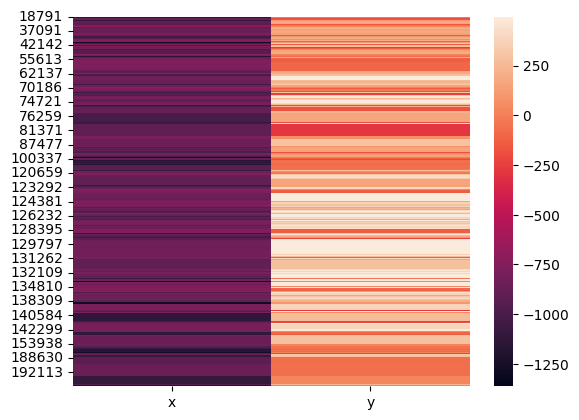

In [53]:
temp = data[data['area_name'] == 'BombsiteB']
temp
import seaborn as sns
import matplotlib.pyplot as plt
temp1 = temp[['x','y']]
sns.heatmap(data = temp1)

In [281]:
temp.describe()

,round_num,tick,hp,armor,x,y,z,total_utility,equipment_value_freezetime_end,seconds,t_alive,ct_alive,utility_used
count,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000,19648.000000
mean,17.746336,304727.999338,67.138742,66.315859,-899.868231,163.107594,94.982339,0.931240,4736.176710,41.202820,3.457095,4.007227,0.003919
std,7.947862,144336.780212,44.526027,45.981194,121.046510,230.392076,20.820815,1.146475,1829.386924,26.236367,1.555244,1.310636,0.065658
min,1.000000,3775.000000,0.000000,0.000000,-1363.000000,-305.000000,23.000000,0.000000,200.000000,0.000000,0.000000,0.000000,-1.000000
25%,12.000000,183015.000000,0.000000,0.000000,-939.000000,-67.000000,96.000000,0.000000,4450.000000,21.000000,2.000000,3.000000,0.000000
50%,18.000000,324785.000000,100.000000,100.000000,-866.000000,164.000000,96.000000,0.000000,5500.000000,36.000000,4.000000,5.000000,0.000000
75%,25.000000,441472.000000,100.000000,100.000000,-819.000000,366.000000,96.000000,2.000000,5900.000000,55.000000,5.000000,5.000000,0.000000
max,30.000000,514220.000000,100.000000,100.000000,-666.000000,496.000000,200.000000,4.000000,8250.000000,120.000000,5.000000,5.000000,1.000000


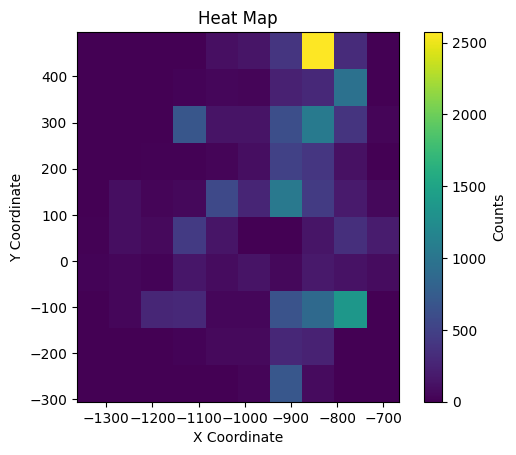

In [282]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D histogram with the X and Y coordinates
heatmap, xedges, yedges = np.histogram2d(temp['x'], temp['y'], bins=10)

# Plot the heat map
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Counts')  # Add a color bar with label
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heat Map')
plt.show()


In [57]:
temp1['x'].nunique()

627

In [46]:
data['area_name'].unique()

array(['TSpawn', 'TStairs', 'Tunnels', 'Fountain', 'LowerPark',
       'Playground', 'Alley', 'Connector', 'BombsiteA', 'Canal', 'Pipe',
       'Water', 'Construction', 'UpperPark', 'Restroom', 'Lobby',
       'StorageRoom', 'SnipersNest', 'BackofA', 'Stairs', 'UnderA',
       'Walkway', 'Bridge', 'BombsiteB', None, 'SideAlley'], dtype=object)

In [15]:
for category, group in grouped_data:
    print(category)
    print(len(group))


1
6640
2
4080
3
8570
4
4100
5
9600
6
8840
7
8740
8
9600
9
8680
10
5540
11
6500
12
9830
13
11190
14
9600
16
7210
17
6670
18
9600
19
4330
20
5160
21
7940
22
10900
23
10430
24
10100
25
4100
26
9600
27
7430
28
6690
29
6310
30
3350


##Shapely Library

In [17]:
from shapely.geometry import Point, Polygon


In [26]:
# Define the coordinates of the quadrilateral vertices
quadrilateral_coords = [(1, 1), (4, 2), (3, 5), (1.5, 4)]
                  [(-1735, 250), (-2024, 398), (-2806, 742), (-2472, 1233), (-1565, 580)]

# Create a Polygon object from the quadrilateral coordinates
quadrilateral = Polygon(quadrilateral_coords)

# Define the coordinates of the point to check
point_coords = (2.5, 3)

# Create a Point object from the point coordinates
point = Point(point_coords)

# Check if the point is inside the quadrilateral
is_inside = quadrilateral.contains(point)

# Print the result
if is_inside:
    print("The point is inside the quadrilateral.")
else:
    print("The point is outside the quadrilateral.")

The point is inside the quadrilateral.


##Scipy library for 3D

In [30]:
# import numpy as np
# from scipy.spatial import Delaunay

# # Define the coordinates of the quadrilateral vertices in 3D space
quadrilateral_coords = np.array([(-1735, 250, 285), (-2024, 398, 285), (-2806, 742, 285), (-2472, 1233, 285), (-1565, 580, 285), (-1735, 250, 421), (-2024, 398, 421), (-2806, 742, 421), (-2472, 1233, 421), (-1565,580 , 421)])
# quadrilateral_coords = np.array([(1, 1, 1), (4, 2, 2), (3, 5, 3), (1.5, 4, 4)])

import numpy as np
from scipy.spatial import Delaunay

# Define the coordinates of the quadrilateral vertices in 3D space
# quadrilateral_coords = np.array([(1, 1, 1), (4, 2, 2), (3, 5, 3), (1.5, 4, 4)])

# Create a Delaunay triangulation of the quadrilateral vertices
triangulation = Delaunay(quadrilateral_coords)

# Define the coordinates of the point to check
point_coords = np.array([-1735, 250, 285])

# Check if the point is inside the convex hull of the quadrilateral vertices
is_inside = triangulation.find_simplex(point_coords) >= 0

# Print the result
if is_inside:
    print("The point is inside the quadrilateral.")
else:
    print("The point is outside the quadrilateral.")


The point is inside the quadrilateral.


In [32]:
import numpy as np
from scipy.spatial import Delaunay

def test(x,y,z):
  quadrilateral_coords = np.array([(-1735, 250, 285), (-2024, 398, 285), (-2806, 742, 285), (-2472, 1233, 285), (-1565, 580, 285), (-1735, 250, 421), (-2024, 398, 421), (-2806, 742, 421), (-2472, 1233, 421), (-1565,580 , 421)])
# quadrilateral_coords = np.array([(1, 1, 1), (4, 2, 2), (3, 5, 3), (1.5, 4, 4)])

  

  # Define the coordinates of the quadrilateral vertices in 3D space
  # quadrilateral_coords = np.array([(1, 1, 1), (4, 2, 2), (3, 5, 3), (1.5, 4, 4)])

  # Create a Delaunay triangulation of the quadrilateral vertices
  triangulation = Delaunay(quadrilateral_coords)

  # Define the coordinates of the point to check
  point_coords = np.array([x,y,z])

  # Check if the point is inside the convex hull of the quadrilateral vertices
  is_inside = triangulation.find_simplex(point_coords) >= 0

  # Print the result
  if is_inside:
      # print("The point is inside the quadrilateral.")
      return 1
  else:
      # print("The point is outside the quadrilateral.")
      return 0


In [37]:
count = 0
for category, group in grouped_data:
    # print(category)
    # print(len(group))
    flag = 1

    for index, row in group.iterrows():
      if flag == 0:
        print("-----------")
        print(row['x'])
        print(row['y'])
        print(row['z'])
        print("No")
        break
      flag = test(row['x'],row['y'],row['z'])
    if flag == 1:
      print('Yes')
    count+=1
print(count)
  



-----------
-1303
-3322
294
No
-----------
-1314
-3240
286
No
-----------
-1412
-3117
285
No
-----------
-1407
-3107
283
No
-----------
-1265
-3244
286
No
-----------
-1321
-3179
284
No
-----------
-1450
-3178
292
No
-----------
-1375
-3328
294
No
-----------
-1499
-3126
291
No
-----------
-1319
-3177
283
No
-----------
-1596
-3183
297
No
-----------
-1564
-3121
294
No
-----------
-1302
-3322
294
No
-----------
-1375
-3325
294
No
-----------
-2397
795
472
No
-----------
-2248
839
472
No
-----------
-2390
708
475
No
-----------
-2301
668
475
No
-----------
-2343
851
472
No
-----------
-2246
915
480
No
-----------
-2263
749
472
No
-----------
-2322
867
472
No
-----------
-2177
876
480
No
-----------
-2334
760
472
No
-----------
-2335
611
480
No
-----------
-2242
918
480
No
-----------
-2330
940
480
No
-----------
-2184
801
472
No
-----------
-2128
782
472
No
29


In [ ]:

def inside(data,x1,x2,y1,y2,z1,z2):
  



#2a

##ROugh work

In [61]:
data.describe()

,round_num,tick,hp,armor,x,y,z,total_utility,equipment_value_freezetime_end,seconds,t_alive,ct_alive,utility_used
count,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000,221330.000000
mean,15.353319,261107.319613,73.277369,69.728817,-1819.130665,-654.268468,273.244215,1.087638,4494.533728,44.036371,3.749559,4.106944,0.002408
std,8.364132,152520.427227,41.329548,43.828431,900.465391,1036.420364,185.746748,1.245739,2074.792692,30.125404,1.469013,1.258415,0.055823
min,1.000000,2511.000000,0.000000,0.000000,-3960.000000,-3401.000000,0.000000,0.000000,200.000000,0.000000,0.000000,0.000000,-2.000000
25%,8.000000,127101.000000,49.000000,0.000000,-2439.000000,-1322.000000,96.000000,0.000000,3900.000000,19.000000,3.000000,4.000000,0.000000
50%,14.000000,230990.000000,100.000000,100.000000,-1857.000000,-523.000000,273.000000,1.000000,5000.000000,39.000000,4.000000,5.000000,0.000000
75%,23.000000,399900.000000,100.000000,100.000000,-1007.000000,162.000000,472.000000,2.000000,5850.000000,66.000000,5.000000,5.000000,0.000000
max,30.000000,514220.000000,100.000000,100.000000,-49.000000,1606.000000,618.000000,4.000000,8250.000000,120.000000,5.000000,5.000000,1.000000


##FInal COde

#2 c

##ROugh work

In [335]:
set_coor
df_set = pd.DataFrame(set_coor, columns=['x', 'y'])

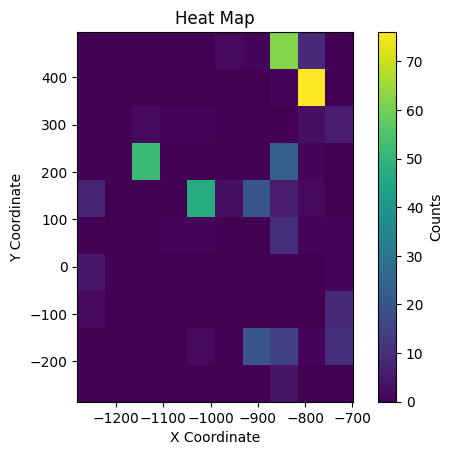

In [336]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D histogram with the X and Y coordinates
heatmap, xedges, yedges = np.histogram2d(df_set['x'], df_set['y'], bins=10)

# Plot the heat map
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Counts')  # Add a color bar with label
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heat Map')
plt.show()

In [323]:
set_coor = []

# for category, group in grouped_data:
  # print(group)
# 
  # grouped_data = data.groupby('round_num')

for category, group in grouped_data:
  # print(group)
  sorted_data_group = group.sort_values(by='tick')
  sorted_data_group_T = sorted_data_group[sorted_data_group['side']=='CT']


  # check if the Terrorist side is Team2 or not
  if sorted_data_group_T['team'].iloc[0] == 'Team1':
    continue

  players_group_bombsite = sorted_data_group_T[sorted_data_group_T['area_name']=='BombsiteB']
  # print(players_group_bombsite)


  new_grouped_data = players_group_bombsite.groupby('player')

  for new_cat ,new_group in new_grouped_data:
    # new_group['WaitingTime'] = new_group.groupby(['x', 'y'])['seconds'].diff().fillna(pd.Timedelta(seconds=0))
    # print(new_group)
    for acat, agr in new_group.groupby(['x','y']):
      if len(agr) > 1:
        # print(len(agr))
        print(acat)
        
        # print(agr)
        set_coor.append([acat[0],acat[1]])

      
    

    # break
# Find the position with the longest wait
    # position_with_longest_wait = new_group.loc[new_group['WaitingTime'].idxmax(), ['x', 'y']]

    # break
  # break


  
    

(-1024, 74)
(-856, 496)
(-854, 496)
(-847, 491)
(-846, 496)
(-839, 496)
(-837, 496)
(-835, 496)
(-833, 496)
(-832, 495)
(-826, 496)
(-784, 495)
(-859, 496)
(-855, 496)
(-854, 496)
(-852, 496)
(-849, 496)
(-848, 496)
(-840, 496)
(-834, 496)
(-833, 496)
(-832, 496)
(-831, 496)
(-830, 496)
(-829, 496)
(-827, 496)
(-824, 496)
(-823, 496)
(-818, 496)
(-813, 496)
(-810, 496)
(-808, 496)
(-807, 496)
(-802, 496)
(-797, 496)
(-795, 496)
(-794, 496)
(-785, 496)
(-784, 496)
(-864, 394)
(-834, 496)
(-833, 496)
(-832, 496)
(-829, 496)
(-827, 496)
(-826, 496)
(-825, 496)
(-824, 496)
(-823, 496)
(-791, 487)
(-789, 496)
(-849, -98)
(-833, 496)
(-832, 496)
(-804, 489)
(-801, 485)
(-773, -136)
(-772, -133)
(-770, -136)
(-743, -136)
(-742, -91)
(-740, -96)
(-740, -95)
(-740, -94)
(-739, -98)
(-739, -97)
(-739, -96)
(-738, -136)
(-738, -102)
(-738, -100)
(-738, -99)
(-737, -103)
(-737, -102)
(-736, -107)
(-736, -106)
(-736, -105)
(-736, -87)
(-1002, 143)
(-999, 143)
(-997, 142)
(-992, -183)
(-981, 150)
(-

## Final COde

In [7]:
def find_max_consecutive_ones(nums):
    max_length = 0
    current_length = 0

    for num in nums:
        if num == 1:
            current_length += 1
            max_length = max(max_length, current_length)
        else:
            current_length = 0

    return max_length

In [8]:
# Wrong approach because i am dropping duplicates based on elapsed seconds and it resets to 0 at bomb plants so didnt consider that.

set_coor = []


grouped_data = data.groupby('round_num')

for category, group in grouped_data:
  
  # sorting by tick and then only choosing CT
  sorted_data_group = group.sort_values(by='tick')
  sorted_data_group_T = sorted_data_group[sorted_data_group['side']=='CT']


  # check if the Terrorist side is Team2 or not
  if sorted_data_group_T['team'].iloc[0] == 'Team1':
    continue
  
  # FIlter out data regarding only bombsite

  players_group_bombsite = sorted_data_group_T[sorted_data_group_T['area_name']=='BombsiteB']
  # print(players_group_bombsite)

  # Group now player wise and analyse individual player movement
  new_grouped_data = players_group_bombsite.groupby('player')


  for new_cat ,new_group in new_grouped_data:

    # new_group['WaitingTime'] = new_group.groupby(['x', 'y'])['seconds'].diff().fillna(pd.Timedelta(seconds=0))
    # print(new_group)
    for acat, agr in new_group.groupby(['x','y']):
      
      
      unique_seconds = agr['seconds'].drop_duplicates()
      if len(unique_seconds) > 1:
        # print(agr)
        print(unique_seconds)
        
        difference_list = list(map(lambda x, y: y - x, unique_seconds[:-1], unique_seconds[1:]))
        print(difference_list)
        # print(agr)
        waiting = find_max_consecutive_ones(difference_list)
        for i in range(waiting):
          set_coor.append([acat[0],acat[1]])

      
    

    # break
# Find the position with the longest wait
    # position_with_longest_wait = new_group.loc[new_group['WaitingTime'].idxmax(), ['x', 'y']]

    # break
  # break


  
    

132897    12
132898    13
Name: seconds, dtype: int64
[1]
133552    11
133560    12
Name: seconds, dtype: int64
[1]
133616    19
133618    20
Name: seconds, dtype: int64
[1]
133568    13
133614    19
Name: seconds, dtype: int64
[6]
133570    14
133600    17
Name: seconds, dtype: int64
[3]
133583    15
133586    16
Name: seconds, dtype: int64
[1]
133593    16
133594    17
Name: seconds, dtype: int64
[1]
133987    15
134023    19
Name: seconds, dtype: int64
[4]
134015    18
134040    21
134051    23
Name: seconds, dtype: int64
[3, 2]
134006    17
134013    18
Name: seconds, dtype: int64
[1]
133997    16
134024    19
134117    31
Name: seconds, dtype: int64
[3, 12]
134042    22
134066    25
Name: seconds, dtype: int64
[3]
134052    23
134118    31
Name: seconds, dtype: int64
[8]
134030    20
134048    22
134121    31
Name: seconds, dtype: int64
[2, 9]
133989    15
133998    16
134007    17
134025    19
134043    22
Name: seconds, dtype: int64
[1, 1, 2, 3]
134120    31
134128    32
134130 

In [9]:
set_coor
df_set = pd.DataFrame(set_coor, columns=['x', 'y'])

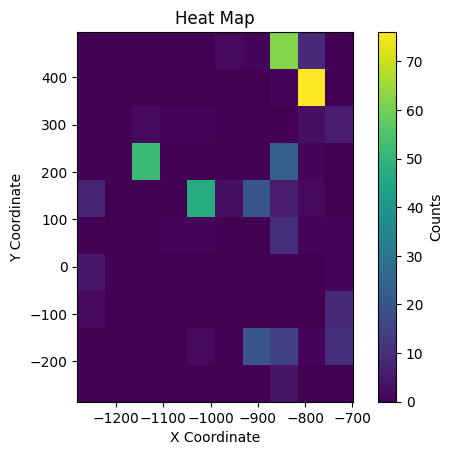

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D histogram with the X and Y coordinates
heatmap, xedges, yedges = np.histogram2d(df_set['x'], df_set['y'], bins=10)

# Plot the heat map
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar(label='Counts')  # Add a color bar with label
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heat Map')
plt.show()

Approach 2 -  Brute Forse and Right Approach

In [54]:
# 

In [56]:
# Wrong approach because i am dropping duplicates based on elapsed seconds and it resets to 0 at bomb plants so didnt consider that.

set_coor = []


grouped_data = data.groupby('round_num')

for category, group in grouped_data:
  
  # sorting by tick and then only choosing CT
  sorted_data_group = group.sort_values(by='tick')
  sorted_data_group_T = sorted_data_group[sorted_data_group['side']=='CT']


  # check if the Terrorist side is Team2 or not
  if sorted_data_group_T['team'].iloc[0] == 'Team1':
    continue
  
  # FIlter out data regarding only bombsite

  players_group_bombsite = sorted_data_group_T[sorted_data_group_T['area_name']=='BombsiteB']
  # print(players_group_bombsite)

  # Group now player wise and analyse individual player movement
  new_grouped_data = players_group_bombsite.groupby('player')


  for new_cat ,new_group in new_grouped_data:

    # new_group['WaitingTime'] = new_group.groupby(['x', 'y'])['seconds'].diff().fillna(pd.Timedelta(seconds=0))
    # print(new_group)

    # Now for each player we will check coordinate wise
    for acat, agr in new_group.groupby(['x','y']):
      
      # remove rows if he is dead
      agr = agr[agr['is_alive']==True] 
      
      
      if len(agr) > 2:
        first_row = agr.iloc[0]
        # last_row = agr.iloc[-1]

        prev = first_row['seconds']
        count_waiting = 0
        max_waiting = 0
        
        for index, row in agr.iterrows():

          
          if prev == row['seconds']:
            continue

          if prev == row['seconds']-1:
            prev = row['seconds']
            count_waiting +=1
          
          elif row['seconds'] == 0 and row['bomb_planted'] == True:
            count_waiting +=1
            prev = 0
          
          else:
            max_waiting = max(max_waiting, count_waiting)
            count_waiting = 0

        max_waiting = max(max_waiting, count_waiting)
       
        if max_waiting > 1:
          set_coor.append([acat[0],acat[1],max_waiting])
          continue

      
   
  
    

In [57]:
set_coor
df_set = pd.DataFrame(set_coor, columns=['x', 'y','waiting'])

In [58]:
df_set

,x,y,waiting
0,-833,496,2
1,-832,496,10
2,-834,496,2
3,-826,496,6
4,-823,496,2
5,-739,-96,3
6,-736,-106,2
7,-992,-183,2
8,-981,150,2
9,-910,161,2


In [59]:
df_set.describe()

,x,y,waiting
count,42.000000,42.000000,42.000000
mean,-847.500000,200.523810,4.285714
std,89.477685,255.730445,4.691901
min,-1278.000000,-272.000000,2.000000
25%,-869.000000,-47.000000,2.000000
50%,-833.500000,226.500000,2.500000
75%,-790.250000,380.750000,5.000000
max,-736.000000,496.000000,30.000000


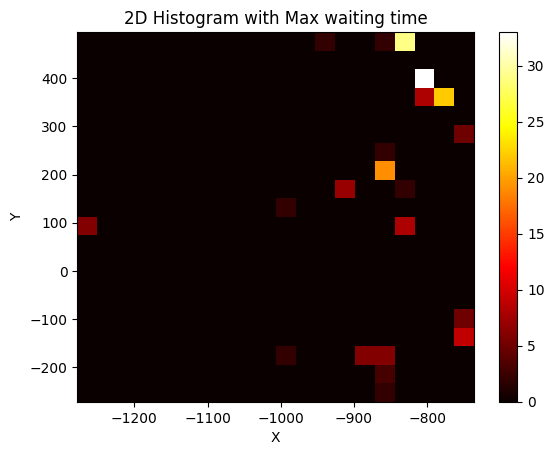

In [53]:
plt.hist2d(df_set['x'], df_set['y'], bins=20, cmap='hot', weights=df_set['waiting'])

# Add colorbar for reference
plt.colorbar()

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Histogram with Max waiting time')

# Display the plot
plt.show()

#Q2 b (I am assuming the defination is atleast 2 rifles enter the Bombzone 2) So it can be player 1 1 rifle at time x then player 2 1 rifle at time y and clock timer y to be used now

##ROugh Work

In [61]:
data

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
0,1,2511,T,Team1,100,100,True,-1310,-3333,294,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
1,1,2527,T,Team1,100,100,True,-1303,-3322,294,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
2,1,2543,T,Team1,100,100,True,-1290,-3303,292,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
3,1,2559,T,Team1,100,100,True,-1275,-3280,290,...,900,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
4,1,2575,T,Team1,100,100,True,-1254,-3262,288,...,900,TSpawn,1,01:55,5,5,False,de_overpass,0.0,Player0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221325,30,514156,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,41,01:14,1,4,False,de_overpass,0.0,Player9
221326,30,514172,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,41,01:14,1,4,False,de_overpass,0.0,Player9
221327,30,514188,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,42,01:14,1,4,False,de_overpass,0.0,Player9
221328,30,514204,T,Team2,0,0,False,-1508,-372,200,...,4250,Water,42,01:14,1,4,False,de_overpass,0.0,Player9


In [62]:
grouped_data = data.groupby('round_num')

In [215]:
for category, group in grouped_data:
    # print(category)
    # print(len(group))
  

SyntaxError: ignored

In [226]:
abc = data[data['side'] == 'T']

abc[abc['area_name']=='BombsiteB']

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
31845,13,206763,T,Team1,94,99,True,-892,-283,96,...,4600,BombsiteB,80,00:35,5,4,False,de_overpass,0.0,Player1
31846,13,206779,T,Team1,94,99,True,-884,-258,96,...,4600,BombsiteB,80,00:35,5,4,False,de_overpass,0.0,Player1
31847,13,206795,T,Team1,94,99,True,-876,-233,96,...,4600,BombsiteB,80,00:35,5,4,False,de_overpass,0.0,Player1
31848,13,206811,T,Team1,94,99,True,-869,-208,96,...,4600,BombsiteB,80,00:35,5,4,False,de_overpass,0.0,Player1
31849,13,206827,T,Team1,94,99,True,-870,-182,96,...,4600,BombsiteB,81,00:35,5,4,False,de_overpass,0.0,Player1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220038,28,484524,T,Team2,72,100,True,-1131,320,51,...,4450,BombsiteB,0,00:40,2,2,True,de_overpass,0.0,Player9
220039,28,484540,T,Team2,72,100,True,-1143,321,45,...,4450,BombsiteB,0,00:40,2,2,True,de_overpass,0.0,Player9
220045,28,484636,T,Team2,72,100,True,-1142,331,45,...,4450,BombsiteB,1,00:39,2,2,True,de_overpass,0.0,Player9
220046,28,484652,T,Team2,72,100,True,-1137,352,48,...,4450,BombsiteB,1,00:39,2,2,True,de_overpass,0.0,Player9


In [227]:
data_round_1 = data[data['round_num'] == 13]

In [228]:
data_round_1

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
9072,13,196523,T,Team1,100,100,True,-1310,-3333,294,...,5200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
9073,13,196539,T,Team1,100,100,True,-1302,-3322,294,...,5200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
9074,13,196555,T,Team1,100,100,True,-1289,-3304,292,...,5200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
9075,13,196571,T,Team1,100,100,True,-1273,-3281,290,...,5200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
9076,13,196587,T,Team1,100,100,True,-1255,-3257,287,...,5200,TSpawn,1,01:55,5,5,False,de_overpass,0.0,Player0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209383,13,214351,CT,Team2,0,0,False,-895,-469,172,...,5500,Construction,45,00:00,4,2,True,de_overpass,0.0,Player9
209384,13,214367,CT,Team2,0,0,False,-895,-469,172,...,5500,Construction,46,00:00,4,2,True,de_overpass,0.0,Player9
209385,13,214383,CT,Team2,0,0,False,-895,-469,172,...,5500,Construction,46,00:00,4,2,True,de_overpass,0.0,Player9
209386,13,214399,CT,Team2,0,0,False,-895,-469,172,...,5500,Construction,46,00:00,4,2,True,de_overpass,0.0,Player9


In [229]:
sorted_data_round_1 = data_round_1.sort_values(by='tick')

In [230]:
sorted_data_round_1

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
9072,13,196523,T,Team1,100,100,True,-1310,-3333,294,...,5200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
53338,13,196523,T,Team1,100,96,True,-1462,-3189,293,...,7050,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player2
75471,13,196523,CT,Team2,100,100,True,-2334,869,472,...,5500,BombsiteA,0,01:55,5,5,False,de_overpass,0.0,Player5
97604,13,196523,CT,Team2,100,100,True,-2092,866,480,...,7350,BombsiteA,0,01:55,5,5,False,de_overpass,0.0,Player7
119737,13,196523,T,Team1,100,100,True,-1462,-3065,284,...,5000,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54456,13,214415,T,Team1,1,78,True,-1573,-3324,308,...,7050,TSpawn,46,00:00,4,2,True,de_overpass,0.0,Player2
32323,13,214415,T,Team1,34,68,True,-2023,-416,134,...,4600,Walkway,46,00:00,4,2,True,de_overpass,0.0,Player1
10190,13,214415,T,Team1,56,84,True,-105,-1462,47,...,5200,Canal,46,00:00,4,2,True,de_overpass,0.0,Player0
187254,13,214415,CT,Team2,100,100,True,-2934,-880,464,...,5900,Restroom,46,00:00,4,2,True,de_overpass,0.0,Player8


In [231]:
sorted_data_round_1_team2_T = sorted_data_round_1[sorted_data_round_1['side']=='T']

In [232]:
sorted_data_round_1_team2_T

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
9072,13,196523,T,Team1,100,100,True,-1310,-3333,294,...,5200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
53338,13,196523,T,Team1,100,96,True,-1462,-3189,293,...,7050,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player2
119737,13,196523,T,Team1,100,100,True,-1462,-3065,284,...,5000,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player3
164003,13,196523,T,Team1,100,94,True,-1604,-3181,297,...,5000,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player4
31205,13,196523,T,Team1,100,100,True,-1538,-3065,290,...,4600,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165121,13,214415,T,Team1,0,0,False,-3005,-2296,474,...,5000,Playground,46,00:00,4,2,True,de_overpass,0.0,Player4
120855,13,214415,T,Team1,100,100,True,-454,-1874,145,...,5000,Alley,46,00:00,4,2,True,de_overpass,0.0,Player3
54456,13,214415,T,Team1,1,78,True,-1573,-3324,308,...,7050,TSpawn,46,00:00,4,2,True,de_overpass,0.0,Player2
32323,13,214415,T,Team1,34,68,True,-2023,-416,134,...,4600,Walkway,46,00:00,4,2,True,de_overpass,0.0,Player1


In [145]:
# sorted_data_round_1_team2_T = sorted_data_round_1_team2_T[sorted_data_round_1_team2_T['team'] == 'Team1']

In [165]:
sorted_data_round_1_team2_T

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
664,2,26002,T,Team1,100,0,True,-1324,-3256,288,...,200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player0
22797,2,26002,T,Team1,100,0,True,-1600,-3178,297,...,200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player1
155595,2,26002,T,Team1,100,0,True,-1528,-3178,294,...,200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player4
111329,2,26002,T,Team1,100,0,True,-1381,-3344,295,...,300,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player3
44930,2,26002,T,Team1,100,0,True,-1459,-3071,284,...,200,TSpawn,0,01:55,5,5,False,de_overpass,0.0,Player2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156002,2,32514,T,Team1,0,0,False,-1968,-1800,96,...,200,Tunnels,51,01:05,0,5,False,de_overpass,0.0,Player4
111736,2,32514,T,Team1,0,0,False,-1677,-2430,336,...,300,Tunnels,51,01:05,0,5,False,de_overpass,0.0,Player3
45337,2,32514,T,Team1,0,0,False,-2401,-2480,581,...,200,Playground,51,01:05,0,5,False,de_overpass,0.0,Player2
23204,2,32514,T,Team1,0,0,False,-3330,-2197,473,...,200,UpperPark,51,01:05,0,5,False,de_overpass,0.0,Player1


In [147]:
# sorted_data_round_1_team2_T[sorted_data_round_1_team2_T['bomb_planted']==True]

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
112520,3,47615,T,Team1,100,100,True,-2584,640,480,...,4500,BombsiteA,0,00:40,4,1,True,de_overpass,0.0,Player3
46121,3,47615,T,Team1,67,100,True,-2336,662,475,...,4900,BombsiteA,0,00:40,4,1,True,de_overpass,0.0,Player2
23988,3,47615,T,Team1,100,100,True,-2474,-1054,432,...,4650,LowerPark,0,00:40,4,1,True,de_overpass,0.0,Player1
1855,3,47615,T,Team1,26,74,True,-2462,503,480,...,4800,BombsiteA,0,00:40,4,1,True,de_overpass,0.0,Player0
156786,3,47615,T,Team1,0,0,False,-3591,-682,489,...,3900,UpperPark,0,00:40,4,1,True,de_overpass,0.0,Player4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156859,3,48786,T,Team1,0,0,False,-3591,-682,489,...,3900,UpperPark,9,00:31,4,0,True,de_overpass,0.0,Player4
112593,3,48786,T,Team1,100,100,True,-3719,-653,489,...,4500,UpperPark,9,00:31,4,0,True,de_overpass,0.0,Player3
46194,3,48786,T,Team1,67,100,True,-1471,328,26,...,4900,Water,9,00:31,4,0,True,de_overpass,0.0,Player2
24061,3,48786,T,Team1,100,100,True,-2004,-1234,283,...,4650,Connector,9,00:31,4,0,True,de_overpass,0.0,Player1


In [233]:
temp_unique_players = sorted_data_round_1_team2_T[sorted_data_round_1_team2_T['area_name']=='BombsiteB'].drop_duplicates(subset='player', keep='first')

In [234]:
temp_unique_players 

,round_num,tick,side,team,hp,armor,is_alive,x,y,z,...,equipment_value_freezetime_end,area_name,seconds,clock_time,t_alive,ct_alive,bomb_planted,map_name,utility_used,player
120371,13,206667,T,Team1,100,100,True,-968,-273,96,...,5000,BombsiteB,79,00:36,5,4,False,de_overpass,0.0,Player3
31845,13,206763,T,Team1,94,99,True,-892,-283,96,...,4600,BombsiteB,80,00:35,5,4,False,de_overpass,0.0,Player1
54012,13,207307,T,Team1,1,78,True,-737,-82,56,...,7050,BombsiteB,84,00:31,5,2,False,de_overpass,0.0,Player2


In [245]:
count_rifle = 0
count_smg = 0
ans = []
for index, row in temp_unique_players.iterrows():

  if count_rifle >= 2 or count_smg >= 2:
    ans.append(row['clock_time'])
    break
  for x in row['inventory']:

    # print(x)
    if x['weapon_class'] == 'Rifle':
      count_rifle+=1
    if x['weapon_class'] == 'SMG':
      count_smg +=1
      
    
print(ans)


['00:31']


In [237]:
# sorted_data_round_1_team2_T['area_name'].unique()
count = 0
for x in temp_unique_players['inventory']:
  
  for y in x:
    if y['weapon_class'] == 'Rifle' or y['weapon_class'] == 'SMG':
      count+=1
  print(count)
    

1
2
3


In [236]:
for x in temp_unique_players['inventory']:
  print('--------')
  for y in x:
    print(y)
  

--------
{'ammo_in_magazine': 20, 'ammo_in_reserve': 120, 'weapon_class': 'Pistols', 'weapon_name': 'Glock-18'}
{'ammo_in_magazine': 30, 'ammo_in_reserve': 90, 'weapon_class': 'Rifle', 'weapon_name': 'AK-47'}
{'ammo_in_magazine': 1, 'ammo_in_reserve': 0, 'weapon_class': 'Grenade', 'weapon_name': 'Smoke Grenade'}
--------
{'ammo_in_magazine': 30, 'ammo_in_reserve': 90, 'weapon_class': 'Rifle', 'weapon_name': 'AK-47'}
{'ammo_in_magazine': 20, 'ammo_in_reserve': 120, 'weapon_class': 'Pistols', 'weapon_name': 'Glock-18'}
--------
{'ammo_in_magazine': 20, 'ammo_in_reserve': 120, 'weapon_class': 'Pistols', 'weapon_name': 'Glock-18'}
{'ammo_in_magazine': 10, 'ammo_in_reserve': 30, 'weapon_class': 'Rifle', 'weapon_name': 'AWP'}
{'ammo_in_magazine': 1, 'ammo_in_reserve': 0, 'weapon_class': 'Grenade', 'weapon_name': 'Smoke Grenade'}
{'ammo_in_magazine': 1, 'ammo_in_reserve': 0, 'weapon_class': 'Grenade', 'weapon_name': 'Molotov'}


In [272]:
ans = []

for category, group in grouped_data:
  # print('--------')
  sorted_data_group = group.sort_values(by='tick')
  
  sorted_data_group_T = sorted_data_group[sorted_data_group['side']=='T']


  # check if the Terrorist side is Team2 or not
  if sorted_data_group_T['team'].iloc[0] == 'Team1':
    continue
  
  # all unique players
  unique_players_group = sorted_data_group_T[sorted_data_group_T['area_name']=='BombsiteB'].drop_duplicates(subset='player', keep='first')
  # print(unique_players_group)
  # check if any player in this round entered the BombSiteB or not
  if unique_players_group.shape[0] == 0:
    continue
  count_rifle = 0
  count_smg = 0
  
  for index, row in unique_players_group.iterrows():

    if count_rifle >= 2 or count_smg >= 2:
      ans.append(row['clock_time'])
      break
    for x in row['inventory']:

      # print(x)
      if x['weapon_class'] == 'Rifle':
        count_rifle+=1
      if x['weapon_class'] == 'SMG':
        count_smg +=1
        
      
print(ans)

# Convert time strings to datetime objects
time_objects = pd.to_datetime(ans, format='%M:%S')

# Calculate average time
average_time = pd.to_datetime(str(time_objects.mean().time()), format='%H:%M:%S.%f').strftime('%M:%S')

# Print the average time
print(average_time)


['01:23', '01:14']
01:18


## Final FUnction

In [338]:
# Final Function

def calculate_average_clock_timer():
  clock_time_list = []
  grouped_data = data.groupby('round_num')

  for category, group in grouped_data:
    
    sorted_data_group = group.sort_values(by='tick')
    
    sorted_data_group_T = sorted_data_group[sorted_data_group['side']=='T']


    # check if the Terrorist side is Team2 or not
    if sorted_data_group_T['team'].iloc[0] == 'Team1':
      continue
    
    # all unique players
    unique_players_group = sorted_data_group_T[sorted_data_group_T['area_name']=='BombsiteB'].drop_duplicates(subset='player', keep='first')
    
    # check if any player in this round entered the BombSiteB or not
    if unique_players_group.shape[0] == 0:
      continue
    
    count_rifle = 0
    count_smg = 0
    
    for index, row in unique_players_group.iterrows():

      if count_rifle >= 2 or count_smg >= 2:
        clock_time_list.append(row['clock_time'])
        break
      for weapon_info in row['inventory']:

        # print(x)
        if weapon_info['weapon_class'] == 'Rifle':
          count_rifle+=1
        if weapon_info['weapon_class'] == 'SMG':
          count_smg +=1
          
        
  # print(clock_time_list)

  # Convert time strings to datetime objects
  time_objects = pd.to_datetime(clock_time_list, format='%M:%S')

  # Calculate average time
  average_time = pd.to_datetime(str(time_objects.mean().time()), format='%H:%M:%S.%f').strftime('%M:%S')

  # Print the average time
  # print(average_time)

  return average_time

average_time = calculate_average_clock_timer()
print(average_time)

01:18
